In [ ]:
import dash
import pandas as pd
# docs: Dash: https://dash.plotly.com/

# Read the CSV file
# df = pd.read_csv("file.csv")

# # Edit the CSV file

# df

# # Write the DataFrame back to a CSV file
# df.to_csv("df.csv", index=False)


Reading Log & PDF Experiments
Reading log Table


,first_name,last_name,birth_country,current_country,country_details,gender,bipoc,lgbtq,disabled,author_details
0,Clayton,Thomas-Muller,Canada,Canada,Cree,M,1,0,0,NaN
1,Robert M.,Sapolsky,US,US,NaN,M,0,0,0,NaN
2,Dina,Gilio-Whitaker,US,US,Colville Confederated Tribes,F,1,0,0,NaN
3,Monica,Gagliano,Australia,Australia,NaN,F,0,0,0,NaN
4,Katherena,Vermette,Canada,Canada,Métis,F,1,0,0,NaN
5,H. Craig,Heller,US,US,NaN,M,0,0,0,NaN
6,Yrsa,Sigurðardóttir,Iceland,Iceland,NaN,F,0,0,0,NaN
7,Bernd,Brunner,Canada,Canada,NaN,M,0,0,0,NaN
8,Emma,Marris,US,US,NaN,F,0,0,0,NaN
9,Linda Kay,Klein,US,US,NaN,F,0,0,0,NaN


Bodleian Library


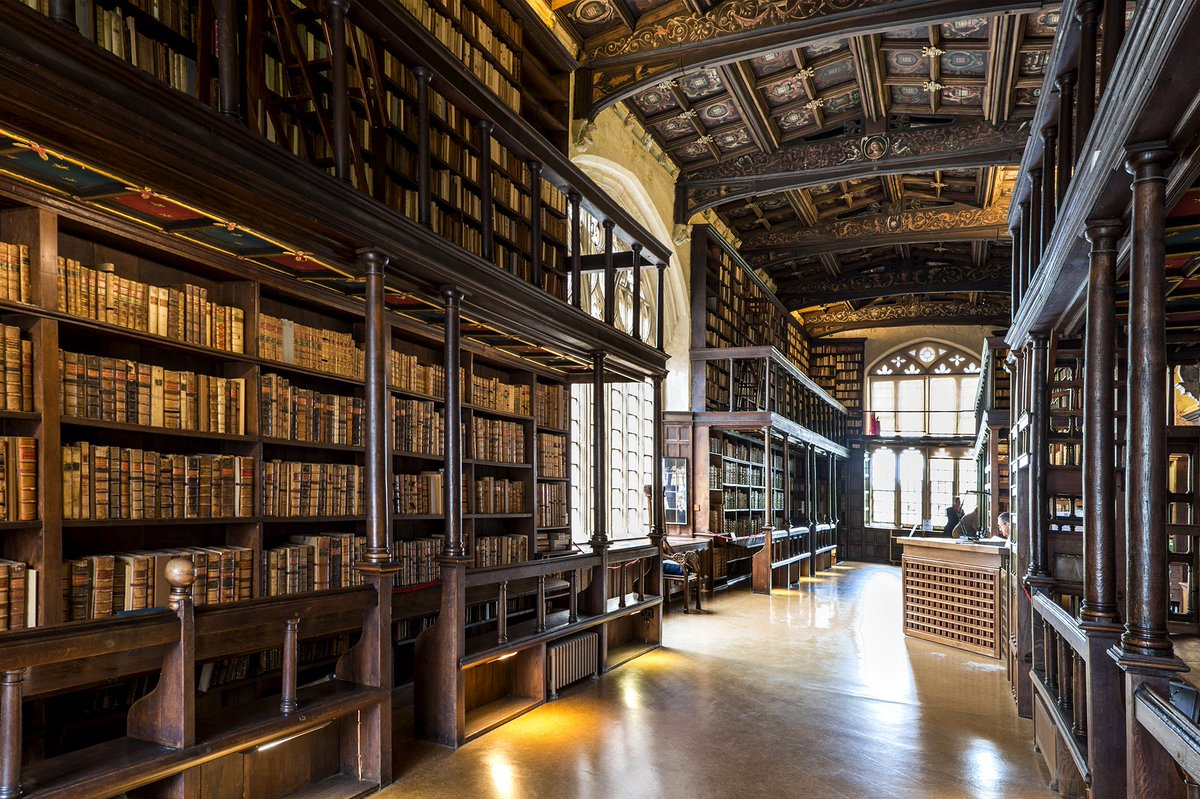

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

# Read the CSV file
authors_df = pd.read_csv("ReadingLogforSQLauthors.csv")

# # setup: insert title, header, dataframe

print('Reading Log & PDF Experiments')

print("Reading log Table")

display(authors_df)

# insert chart



# insert image

print("Bodleian Library")

image = Image.open(
    "Bodleian Library 4-Duke Humpries Reading Room.jpg")

display(image)

# The following OR Command line: Use the tool "nbconvert" to convert the .ipynb file to a PDF, e.g. jupyter nbconvert --to pdf filename.ipynb


In [13]:
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.lib.pagesizes import legal, landscape
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Image, PageBreak
from reportlab.lib.units import inch
from reportlab.lib.styles import ParagraphStyle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# from PIL import Image

# Read the CSV file
authors_df = pd.read_csv("ReadingLogforSQLauthors.csv")

# Define the PDF document & set first titles
doc = SimpleDocTemplate(
    "book_report.pdf", pagesize=landscape(legal))

title = "Reading Log & PDF Experiments"
style = ParagraphStyle(name="title", fontSize=24, alignment=1, spaceAfter=24)
title_paragraph = Paragraph(title, style)

subtitle = "Authors"
style = ParagraphStyle(name="subtitle", fontSize=18,
                       alignment=1, spaceAfter=24)
subtitle_paragraph = Paragraph(subtitle, style)

# Create the table object
table = Table(authors_df.values.tolist(), colWidths=[None])

# Apply a style to the table
style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                    ('BACKGROUND', (0, 1), (-1, -1), colors.white),
                    ('GRID', (0, 0), (-1, -1), 1, colors.black)
                    ])

table.setStyle(style)

def generate_pdf(filename):
    pdf_file = canvas.Canvas(filename, pagesize=(8.5*72, 11*72))
    # Add the table to the PDF document
    doc.build([title_paragraph, subtitle_paragraph,
               table, PageBreak()])


generate_pdf("book_report.pdf")


In [ ]:
from django.http import FileResponse
from django.template.loader import get_template
from xhtml2pdf import pisa


def generate_pdf_view(request):
    template = get_template('notebook.html')
    html = template.render({})
    result = BytesIO()
    pdf = pisa.pisaDocument(BytesIO(html.encode("UTF-8")), result)
    if not pdf.err:
        return FileResponse(result, content_type='application/pdf')
    else:
        return HttpResponse("Error generating PDF")
